<h1>Intro to Computer Music, Lab5</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:

1. learn how to use pretty_midi library to generate MIDI in python
2. We focus on the basics this week: Note-on and Note-off
2. Use MIDI to recreate a simple composition by coding

<h2> Load packages </h2>


In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
from __future__ import print_function 

<h2>Pretty MIDI Library</h2>

Let's first install pretty_midi: 

a) Download the package from https://github.com/craffel/pretty-midi

b) In the terminal, go to the folder, and run "python setup.py install"

On my Mac, step b) looks like:

Then, use pretty MIDI library to create a simple chord:

In [2]:
import pretty_midi
# Create a PrettyMIDI object
cello_music = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a cello instrument
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
# Iterate over note names, which will be converted to note number later
for note_name in ['C4', 'E4', 'G4','C5', 'E5', 'G5','C6']:
    # Retrieve the MIDI note number for this note name
    note_number = pretty_midi.note_name_to_number(note_name)
    # Create a Note instance for this note, starting at 0s and ending at 3s
    note = pretty_midi.Note(velocity=100, pitch=note_number, start=0, end=3)
    # Add it to our cello instrument
    cello.notes.append(note)
# Add the cello instrument to the PrettyMIDI object
cello_music.instruments.append(cello)
# Write out the MIDI data
cello_music.write('cello-C-chord.mid')

run the code above, now you should be able to find the midi file "cello-C-chord.mid" in the homework folder. If you want to use another instrument, simply substitute "Cello" with any standard MIDI instrument. A list can be found here http://www.pgmusic.com/tutorial_gm.htm

<h2>More of Data structure:</h2>


In [3]:
print(cello_music)
print(cello_music.instruments)
print(cello_music.instruments[0])
print(cello)
print(cello_music.instruments[0] == cello)

[Instrument(program=42, is_drum=False, name="")]
Instrument(program=42, is_drum=False, name="")
Instrument(program=42, is_drum=False, name="")
True


Let's look at the notes inside the cello. It is a list, where each element is a "Note" object.

In [4]:
cello.notes

[Note(start=0.000000, end=3.000000, pitch=60, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=64, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=67, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=72, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=76, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=79, velocity=100),
 Note(start=0.000000, end=3.000000, pitch=84, velocity=100)]

In [5]:
piano_roll_representation = cello.get_piano_roll(fs = 100)
print(piano_roll_representation)
imshow(piano_roll_representation)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [6]:
wave = cello.synthesize(fs = 44100)
IPython.display.Audio(data=wave, rate=44100) # press the "play" button to hear audio

<h2>A More Efficient Way for Music Generation:</h2>


We can also see this note list as a 7 by 4 matrix, and create/manipulate the matrix by built-in numpy methods. 

In [7]:
#import numpy library
from pylab import *
%matplotlib inline 

# create a 3 * 4 matrix, with initial values 0
note_matrix = matrix(zeros((7,4)))
print ("initial matrix is:\n", note_matrix)
### fill the matrix. 
# For a matrix M, numpy uses M[row_index, colume_index] to access the element
# M[:, column_index] returns an entire colume, and the same principle applies to 
# M[row_index, :]
note_matrix[:,2] = matrix([60,64,67,72,76,79,84]).T #.T is transpose
# start, end, and velocity. This assignment can be done in one line
# Note that the initial index is 0
note_matrix[:,[0,1,3]] = [0,3,100]
print ("now the matrix is:\n", note_matrix)

initial matrix is:
 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
now the matrix is:
 [[   0.    3.   60.  100.]
 [   0.    3.   64.  100.]
 [   0.    3.   67.  100.]
 [   0.    3.   72.  100.]
 [   0.    3.   76.  100.]
 [   0.    3.   79.  100.]
 [   0.    3.   84.  100.]]


One advantage of this matrix representation is easy manipulation. For example:

In [8]:
length = size(note_matrix,0)
# change starting time, ending time, and velocity by one line command
note_matrix[:,[0,1,3]] = matrix([[x for x in range(length)],
                                 [x+1 for x in range(length)],
                                 [100- x**2.5 for x in range(length)]]).T
print ("we've got an arpeggio with decreasing velocity:\n", note_matrix)

we've got an arpeggio with decreasing velocity:
 [[   0.            1.           60.          100.        ]
 [   1.            2.           64.           99.        ]
 [   2.            3.           67.           94.34314575]
 [   3.            4.           72.           84.41154273]
 [   4.            5.           76.           68.        ]
 [   5.            6.           79.           44.09830056]
 [   6.            7.           84.           11.81836926]]


We can then call the following function to transfer the matrix back to "pretty_midi note", and output the MIDI file. After you run the cell, check the home work folder for the new MIDI file.

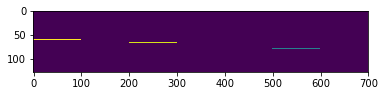

In [9]:
def matrix2notes(m):
    # first sort the matrix to make sure starting time is in order
    m = array(m)
    m = m[argsort(m[:,0]),:]
    # transfer the databack to note list
    notes=[pretty_midi.Note(start=m[i,0], end=m[i,1], pitch=int(m[i,2]), velocity= int(m[i,3]) ) 
                            for i in range(size(m,0))]
    return notes

cello.notes = matrix2notes(note_matrix)
cello_music.write('cello-arpeggio.mid')
imshow(cello.get_piano_roll())

<h2> To do: create your own piece </h2>

1. create or re-create a simple score using the pretty_midi
2. make sure you are not hard-coding each note, but using some numpy matrix/ndarrary methods
3. create the corresponding piano_roll display for your piece. Try to plot it in a better way. (Hint: change color, add axis labels, look at imshow documentation)
4. upload the code and .mid file to NYU Classes
